# 01 Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create path
path = r'/Users/dana/Documents/Pew Research Reading Project/'

# import data
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','dfbooks.pkl'))

# 02 Task

In [3]:
# I don't need to take out any columns because I only have 3 continuous variables

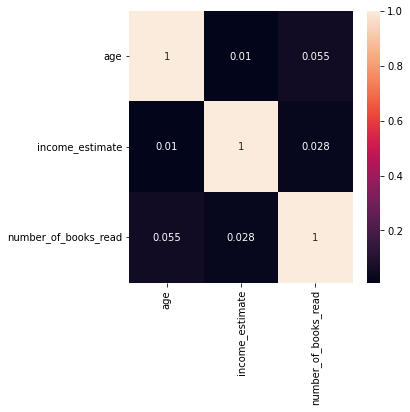

In [4]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [5]:
# the above heatmap means that none of the three continuous variable have a correlation

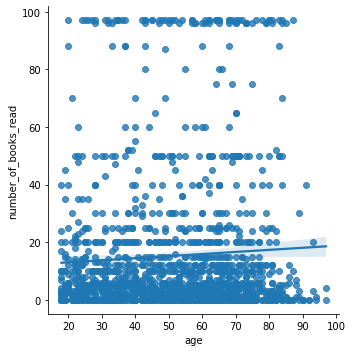

In [6]:
# Create a scatterplot for the "age" and "number_of_books_read" columns in seaborn

sns.lmplot(x = 'age', y = 'number_of_books_read', data = df)

In [7]:
# there is no relationship

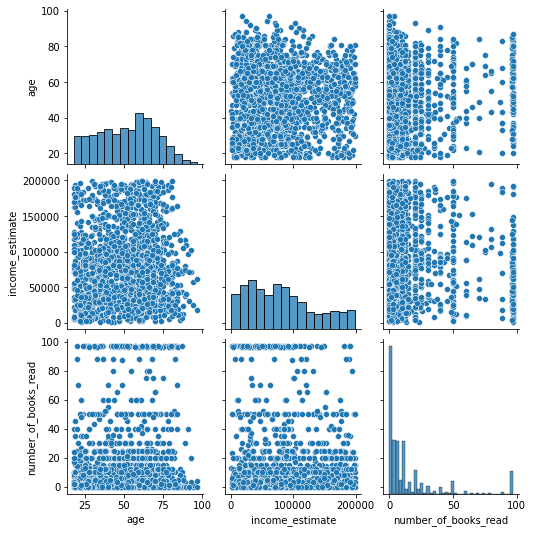

In [8]:
# Create a pair plot 

g = sns.pairplot(df)

In [9]:
# again there aren't really any patterns or relationships between these variables

<AxesSubplot:xlabel='number_of_books_read', ylabel='Count'>

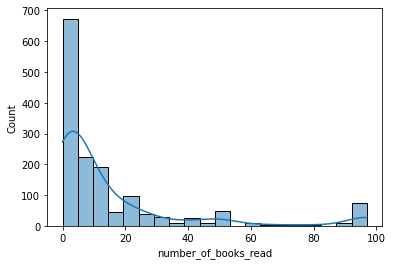

In [10]:
# create a histogram to determine categories
sns.histplot(df['number_of_books_read'], bins = 20, kde = True)

In [11]:
df.loc[df['number_of_books_read'] < 1, 'reader_category'] = 'Non-reader'

In [12]:
df.loc[(df['number_of_books_read'] >= 1) & (df['number_of_books_read'] <= 20), 'reader_category'] = 'Average reader'

In [13]:
df.loc[(df['number_of_books_read'] > 20) & 
       (df['number_of_books_read'] <= 50) , 'reader_category'] = 'Above average reader'

In [14]:
df.loc[df['number_of_books_read'] > 50, 'reader_category'] = 'Prolific reader'

In [15]:
df['reader_category'].value_counts(dropna = False)

Average reader          916
Non-reader              296
Above average reader    177
Prolific reader         113
Name: reader_category, dtype: int64

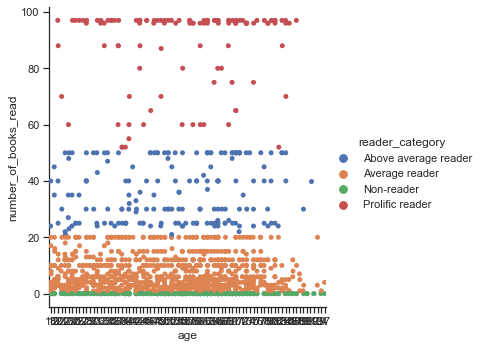

In [16]:
# Create a categorical plot in seaborn using the reader categories created above

sns.set(style='ticks')
g = sns.catplot(x='age', y='number_of_books_read', hue='reader_category', data=df)

In [17]:
# there's still no pattern, but I think the reader_category might be useful for other analysis

# 03 Creating Useful Variables

In [18]:
# create age groups

<AxesSubplot:xlabel='age', ylabel='Count'>

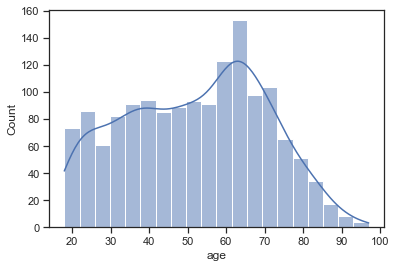

In [19]:
sns.histplot(df['age'], bins = 20, kde = True)

In [20]:
df.loc[df['age'] <= 25, 'generation'] = 'Gen Z'

In [21]:
df.loc[(df['age'] > 25) & (df['age'] <= 41) , 'generation'] = 'Millenials'

In [22]:
df.loc[(df['age'] > 41) & (df['age'] <= 57) , 'generation'] = 'Gen X'

In [23]:
df.loc[(df['age'] > 57) & (df['age'] <= 76) , 'generation'] = 'Boomers'

In [24]:
df.loc[df['age'] >= 77, 'generation'] = 'Silent Gen'

In [25]:
df['generation'].value_counts()

Boomers       530
Gen X         358
Millenials    328
Gen Z         159
Silent Gen    127
Name: generation, dtype: int64

In [26]:
# create a new column that shows what form of books a person reads

In [27]:
df.loc[(df['read_printed_books'] == 'Yes') & (df['read_audiobooks'] == 'No') &
       (df['read_e-books'] == 'No'), 'reading_type'] = 'Printed only'

In [28]:
df.loc[(df['read_printed_books'] == 'No') & (df['read_audiobooks'] == 'Yes') &
       (df['read_e-books'] == 'No'), 'reading_type'] = 'Audio only'

In [29]:
df.loc[(df['read_printed_books'] == 'No') & (df['read_audiobooks'] == 'No') &
       (df['read_e-books'] == 'Yes'), 'reading_type'] = 'E-books only'

In [30]:
df.loc[(df['read_printed_books'] == 'Yes') & (df['read_audiobooks'] == 'Yes') &
       (df['read_e-books'] == 'Yes'), 'reading_type'] = 'All forms'

In [31]:
df.loc[(df['read_printed_books'] == 'No') & (df['read_audiobooks'] == 'Yes') &
       (df['read_e-books'] == 'Yes'), 'reading_type'] = 'Audio and e-books'

In [32]:
df.loc[(df['read_printed_books'] == 'Yes') & (df['read_audiobooks'] == 'Yes') &
       (df['read_e-books'] == 'No'), 'reading_type'] = 'Printed and audio'

In [33]:
df.loc[(df['read_printed_books'] == 'Yes') & (df['read_audiobooks'] == 'No') &
       (df['read_e-books'] == 'Yes'), 'reading_type'] = 'Printed and e-books'

In [34]:
df.loc[(df['read_printed_books'] == 'No') & (df['read_audiobooks'] == 'No') &
       (df['read_e-books'] == 'No') & (df['number_of_books_read'] > 0), 'reading_type'] = 'Unknown'

In [35]:
df.loc[(df['number_of_books_read'] == 0), 'reading_type'] = 'Non-reader'

In [36]:
df['reading_type'].value_counts(dropna=False)

Printed only           520
Non-reader             296
Printed and e-books    228
All forms              150
Printed and audio      143
E-books only            70
Audio only              41
Unknown                 31
Audio and e-books       23
Name: reading_type, dtype: int64

In [37]:
# group education into categories
df['education'].value_counts()

Bachelors degree           389
High school graduate       313
Postgraduate degree        274
Some college, no degree    244
Associate degree           156
High school incomplete      44
Some graduate school        42
Refused                     20
Less than high school       17
Do not know                  3
Name: education, dtype: int64

In [38]:
df.loc[(df['education'] == 'Less than high school') | 
       (df['education'] == 'High school incomplete'),'education_group'] = 'Less than high school'
df.loc[df['education'] == 'High school graduate','education_group'] = 'High school graduate'
df.loc[(df['education'] == 'Associate degree') | 
       (df['education'] == 'Some college, no degree'),'education_group'] = 'College < 4yr degree'
df.loc[df['education'] == 'Bachelors degree','education_group'] = 'College 4yr degree'
df.loc[(df['education'] == 'Some graduate school') | 
       (df['education'] == 'Postgraduate degree'),'education_group'] = 'College > 4yr degree'

In [39]:
df['education_group'].value_counts()

College < 4yr degree     400
College 4yr degree       389
College > 4yr degree     316
High school graduate     313
Less than high school     61
Name: education_group, dtype: int64

# Additional Visualizations

In [40]:
# make a subgroup of only people who read at least 5 books for visualizations about type of books read so that
# they don't include non-readers
dfreaders = df[df['number_of_books_read']>=5]

In [41]:
dfreaders.shape

(829, 24)

In [42]:
dfreaders['number_of_books_read'].describe()

count    829.000000
mean      26.626055
std       27.668022
min        5.000000
25%        8.000000
50%       14.000000
75%       30.000000
max       97.000000
Name: number_of_books_read, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Printed only'),
  Text(1, 0, 'Printed and audio'),
  Text(2, 0, 'Printed and e-books'),
  Text(3, 0, 'Non-reader'),
  Text(4, 0, 'E-books only'),
  Text(5, 0, 'All forms'),
  Text(6, 0, 'Audio only'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Audio and e-books')])

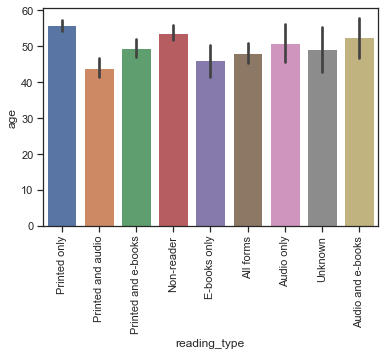

In [43]:
# what is the average age of readers of the different types of books?
sns.barplot(data=df, x='reading_type', y='age')
plt.xticks(rotation=90)

In [44]:
# this doesn't show much of a difference. I should look at the generations

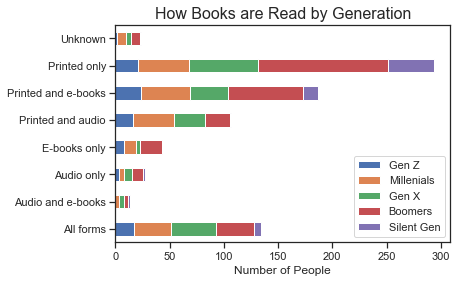

In [45]:
dfreaders.groupby(['reading_type', 'generation']).size().unstack().plot(
    y=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],kind='barh', stacked=True)
plt.title('How Books are Read by Generation',size=16)
plt.xlabel('Number of People')
plt.ylabel('')
plt.legend(title='')

In [46]:
# boomers are the largest age group, so they read the most books. Let's see what the percentages look like

In [47]:
# calculate percentage to show out of 100
df2 = (dfreaders.groupby(['reading_type','generation'])['generation'].count()/
       dfreaders.groupby(['reading_type'])['generation'].count())

Text(0, 0.5, '')

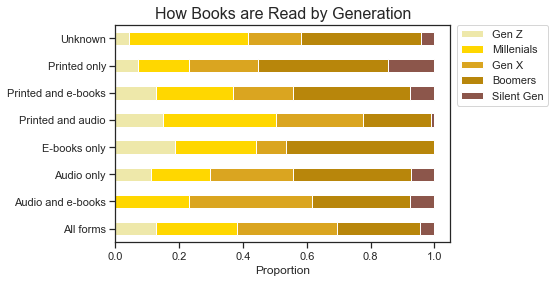

In [48]:
df2.unstack().plot.barh(y=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],stacked=True,
                       color=['palegoldenrod','gold','goldenrod','darkgoldenrod','tab:brown'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('How Books are Read by Generation',size=16)
plt.xlabel('Proportion')
plt.ylabel('')
# surprisingly people of all age groups seem to read in different ways, older people read e-books and audiobooks
# and Gen Z reads printed books too

Text(0, 0.5, '')

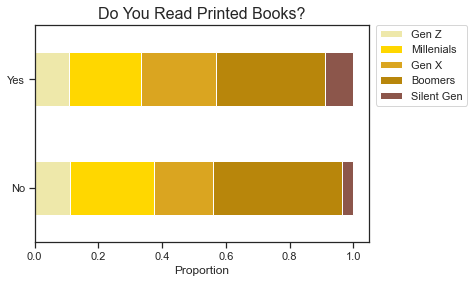

In [49]:
# let's look at each type seperately
df3 = (dfreaders.groupby(['read_printed_books','generation'])['generation'].count()/
       dfreaders.groupby(['read_printed_books'])['generation'].count())
df3.unstack().plot.barh(y=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],stacked=True,
                       color=['palegoldenrod','gold','goldenrod','darkgoldenrod','tab:brown'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Do You Read Printed Books?',size=16)
plt.xlabel('Proportion')
plt.ylabel('')

In [50]:
# no big differences there

Text(0, 0.5, '')

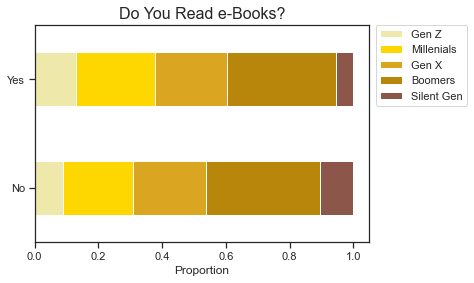

In [51]:
# what about e-books?
df4 = (dfreaders.groupby(['read_e-books','generation'])['generation'].count()/
       dfreaders.groupby(['read_e-books'])['generation'].count())
df4.unstack().plot.barh(y=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],stacked=True,
                       color=['palegoldenrod','gold','goldenrod','darkgoldenrod','tab:brown'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Do You Read e-Books?',size=16)
plt.xlabel('Proportion')
plt.ylabel('')

In [52]:
# slightly less old people (boomers & silent gen) read e-books but not by much

Text(0, 0.5, '')

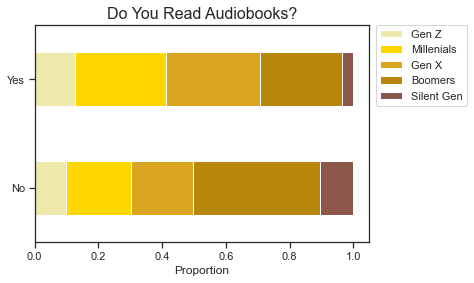

In [53]:
# and what about audiobooks?
df5 = (dfreaders.groupby(['read_audiobooks','generation'])['generation'].count()/
       dfreaders.groupby(['read_audiobooks'])['generation'].count())
df5.unstack().plot.barh(y=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'],stacked=True,
                       color=['palegoldenrod','gold','goldenrod','darkgoldenrod','tab:brown'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Do You Read Audiobooks?',size=16)
plt.xlabel('Proportion')
plt.ylabel('')

In [54]:
# similar result to e-books. Less old people but not as big a difference as I thought

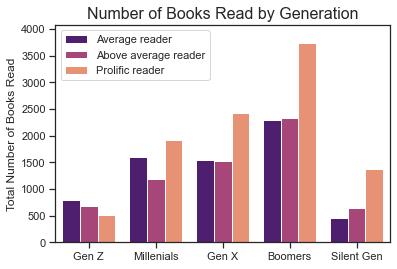

In [55]:
sns.barplot(x = 'generation', y = 'number_of_books_read', hue = 'reader_category', data = df, errwidth=0,
           hue_order=['Average reader','Above average reader','Prolific reader'],palette='magma',estimator=sum,
           order=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'])
plt.ylabel('Total Number of Books Read')
plt.xlabel('')
plt.title('Number of Books Read by Generation',size=16)
plt.legend(title='')

In [56]:
# this chart is interesting, but reflects relative population sizes of the generations more than it does reading

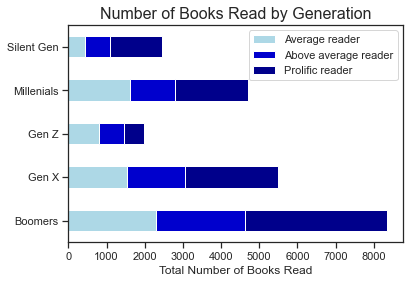

In [57]:
# just for fun, let's look at it in a stacked bar chart
df.groupby(['generation', 'reader_category']).sum()['number_of_books_read'].unstack().plot( 
    y=['Average reader','Above average reader','Prolific reader'], color=['lightblue','mediumblue','darkblue'], 
    kind='barh', stacked=True)
plt.xlabel('Total Number of Books Read')
plt.ylabel('')
plt.title('Number of Books Read by Generation',size=16)
plt.legend(title='')

Text(0.5, 1.0, 'Average Number of Books Read by Generation')

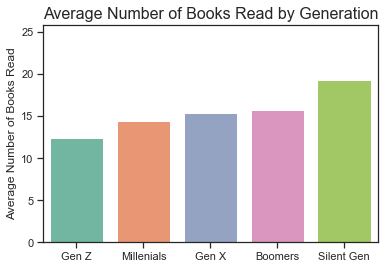

In [58]:
# let's see the average books read by generation
sns.barplot(data=df, x='generation', y='number_of_books_read',palette='Set2',errwidth=0,
           order=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'])
plt.xlabel('')
plt.ylabel('Average Number of Books Read')
plt.title('Average Number of Books Read by Generation',size=16)

Text(0.5, 1.0, 'Average Number of Books Read by Generation')

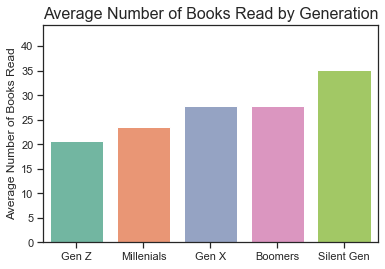

In [59]:
# what about when excluding the non-readers?
sns.barplot(data=dfreaders, x='generation', y='number_of_books_read',palette='Set2',errwidth=0,
           order=['Gen Z','Millenials','Gen X','Boomers','Silent Gen'])
plt.xlabel('')
plt.ylabel('Average Number of Books Read')
plt.title('Average Number of Books Read by Generation',size=16)

In [60]:
# both charts seem to show that the older a person is, the more books they have read on average

In [61]:
# trying a few other demographic variables to see if there's anything significant

<AxesSubplot:xlabel='parent', ylabel='number_of_books_read'>

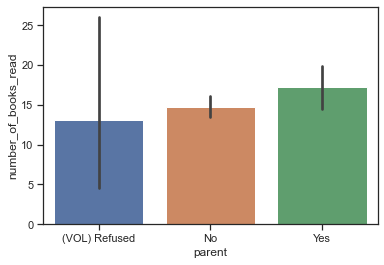

In [62]:
sns.barplot(data=df, x='parent', y='number_of_books_read')

<AxesSubplot:xlabel='number_of_books_read', ylabel='employment'>

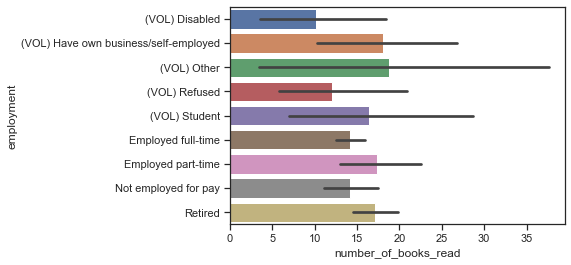

In [63]:
sns.barplot(data=df, y='employment', x='number_of_books_read')

In [64]:
df.loc[(df['employment'] == '(VOL) Disabled') | (df['employment'] == '(VOL) Student') |
       (df['employment'] == 'Not employed for pay') | (df['employment'] == 'Retired'),
       'employed'] = 'Not employed'

In [65]:
df.loc[(df['employment'] == '(VOL) Have own business/self-employed') | (df['employment'] == 'Employed full-time') |
       (df['employment'] == 'Employed part-time'), 'employed'] = 'Employed'

In [66]:
df['employment'].value_counts(dropna=False)

Employed full-time                       640
Retired                                  402
Not employed for pay                     201
Employed part-time                       147
(VOL) Have own business/self-employed     43
(VOL) Disabled                            34
(VOL) Refused                             21
(VOL) Student                              9
(VOL) Other                                5
Name: employment, dtype: int64

In [67]:
df['employed'].value_counts(dropna=False)

Employed        830
Not employed    646
NaN              26
Name: employed, dtype: int64

<AxesSubplot:xlabel='number_of_books_read', ylabel='employed'>

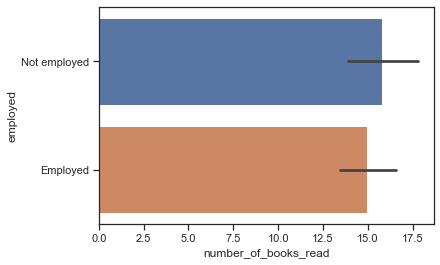

In [68]:
sns.barplot(data=df, y='employed', x='number_of_books_read')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, "(VOL) Don't know"),
  Text(1, 0, '(VOL) Other party'),
  Text(2, 0, '(VOL) Refused'),
  Text(3, 0, 'Democrat'),
  Text(4, 0, 'Independent'),
  Text(5, 0, 'Republican'),
  Text(6, 0, 'VOL) No preference')])

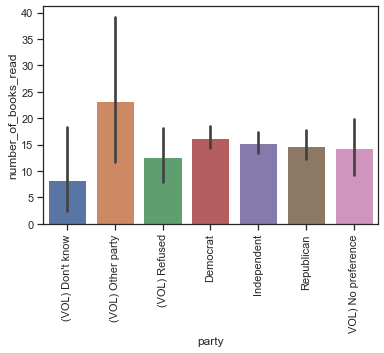

In [69]:
sns.barplot(data=df, x='party', y='number_of_books_read')
plt.xticks(rotation=90)

In [70]:
# the above charts don't seem to show anything significant

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Some college, no degree'),
  Text(1, 0, 'High school graduate'),
  Text(2, 0, 'Postgraduate degree'),
  Text(3, 0, 'Bachelors degree'),
  Text(4, 0, 'Associate degree'),
  Text(5, 0, 'Some graduate school'),
  Text(6, 0, 'Refused'),
  Text(7, 0, 'High school incomplete'),
  Text(8, 0, 'Less than high school'),
  Text(9, 0, 'Do not know')])

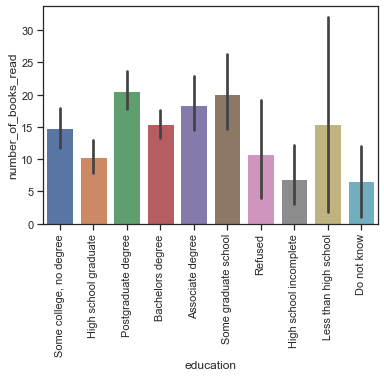

In [71]:
# let's look at education
sns.barplot(data=df, x='education', y='number_of_books_read')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Books Read by Education Level')

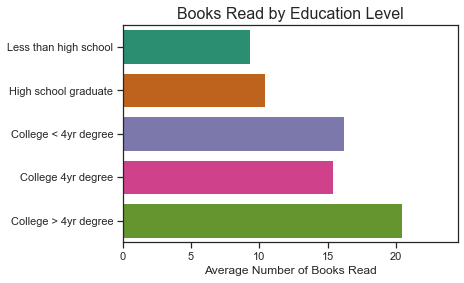

In [72]:
# use education groups so that it's easier to read
sns.barplot(data=df, y='education_group', x='number_of_books_read',palette='Dark2',errwidth=0,
           order=['Less than high school','High school graduate','College < 4yr degree','College 4yr degree',
                  'College > 4yr degree'])
plt.ylabel('')
plt.xlabel('Average Number of Books Read')
plt.title('Books Read by Education Level',size=16)

In [73]:
# higher education attainment does seem to have a positive correlation with number of books read!

Text(0.5, 1.0, 'Total Books Read by Education Level')

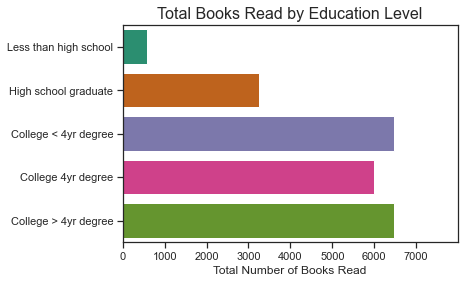

In [74]:
sns.barplot(data=df, y='education_group', x='number_of_books_read',palette='Dark2',errwidth=0,
           order=['Less than high school','High school graduate','College < 4yr degree','College 4yr degree',
                  'College > 4yr degree'],estimator=sum)
plt.ylabel('')
plt.xlabel('Total Number of Books Read')
plt.title('Total Books Read by Education Level',size=16)

In [75]:
# people with at least some college education read more than those without

In [76]:
# what about by proportion?
df6 = (df.groupby(['reader_category','education_group'])['education_group'].count()/
       df.groupby(['reader_category'])['education_group'].count())

Text(0, 0.5, '')

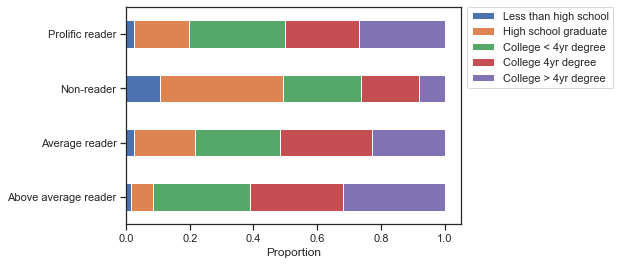

In [77]:
df6.unstack().plot.barh(stacked=True, y=['Less than high school','High school graduate','College < 4yr degree',
                                             'College 4yr degree','College > 4yr degree'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('',size=16)
plt.xlabel('Proportion')
plt.ylabel('')

In [78]:
# that one isn't as interesting

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Less than $10,000'),
  Text(1, 0, '10 to under $20,000'),
  Text(2, 0, '20 to under $30,000'),
  Text(3, 0, '30 to under $40,000'),
  Text(4, 0, '40 to under $50,000'),
  Text(5, 0, '50 to under $75,000'),
  Text(6, 0, '75 to under $100,000'),
  Text(7, 0, '100 to under $150,000'),
  Text(8, 0, '$150,000 or more')])

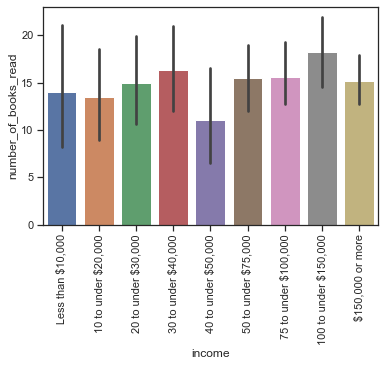

In [79]:
# I should also look at income
sns.barplot(data=df, x='income', y='number_of_books_read',
            order=['Less than $10,000','10 to under $20,000','20 to under $30,000','30 to under $40,000',
                  '40 to under $50,000','50 to under $75,000','75 to under $100,000','100 to under $150,000',
                  '$150,000 or more'])
plt.xticks(rotation=90)

In [80]:
# doesn't seem to be related

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Above average reader'),
  Text(1, 0, 'Average reader'),
  Text(2, 0, 'Non-reader'),
  Text(3, 0, 'Prolific reader')])

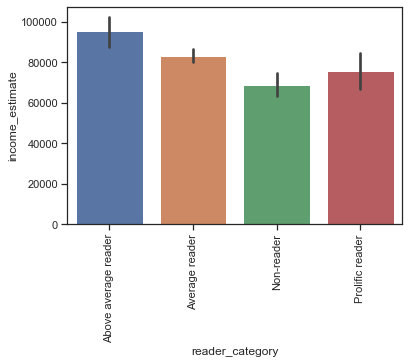

In [81]:
sns.barplot(data=df, x='reader_category', y='income_estimate')
plt.xticks(rotation=90)

In [82]:
# above average readers have a higher average income, but prolific readers are lower, 
# so that doesn't show a relationship

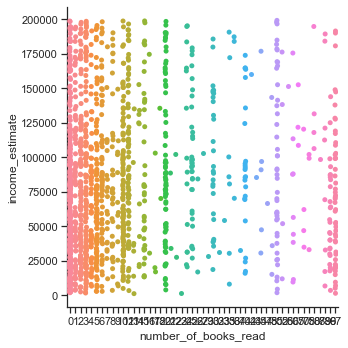

In [83]:
g = sns.catplot(x='number_of_books_read', y='income_estimate', data=df)

In [84]:
# I don't see any patterns there

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Printed only'),
  Text(1, 0, 'Printed and audio'),
  Text(2, 0, 'Printed and e-books'),
  Text(3, 0, 'Non-reader'),
  Text(4, 0, 'E-books only'),
  Text(5, 0, 'All forms'),
  Text(6, 0, 'Audio only'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Audio and e-books')])

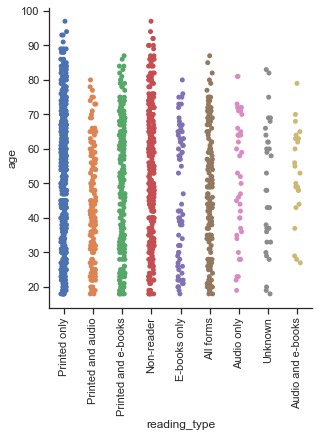

In [85]:
# let's look at reading type again
g = sns.catplot(x='reading_type', y='age', data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Printed only'),
  Text(1, 0, 'Printed and audio'),
  Text(2, 0, 'Printed and e-books'),
  Text(3, 0, 'Non-reader'),
  Text(4, 0, 'E-books only'),
  Text(5, 0, 'All forms'),
  Text(6, 0, 'Audio only'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Audio and e-books')])

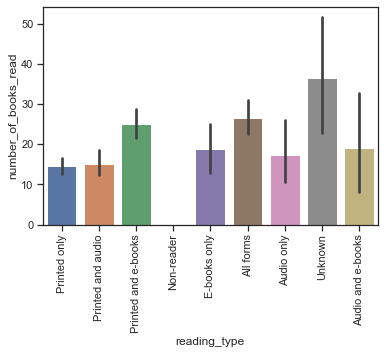

In [86]:
sns.barplot(data=df, x='reading_type', y='number_of_books_read')
plt.xticks(rotation=90)

In [87]:
# do people who read e-books read more than those who don't?

<AxesSubplot:xlabel='read_e-books', ylabel='number_of_books_read'>

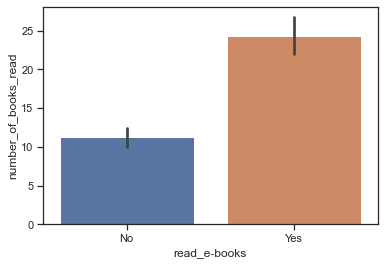

In [88]:
sns.barplot(data=df, x='read_e-books', y='number_of_books_read')

<AxesSubplot:xlabel='read_e-books', ylabel='number_of_books_read'>

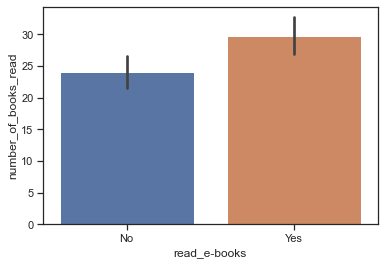

In [89]:
sns.barplot(data=dfreaders, x='read_e-books', y='number_of_books_read')

In [90]:
# people who read e-books did read more books those who didn't. How do printed and audiobooks compare?

<AxesSubplot:xlabel='read_printed_books', ylabel='number_of_books_read'>

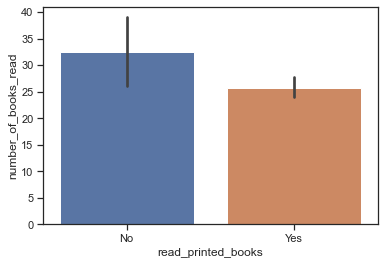

In [91]:
sns.barplot(data=dfreaders, x='read_printed_books', y='number_of_books_read')

<AxesSubplot:xlabel='read_audiobooks', ylabel='number_of_books_read'>

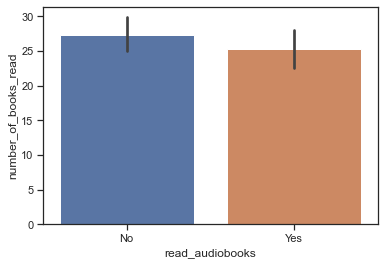

In [92]:
sns.barplot(data=dfreaders, x='read_audiobooks', y='number_of_books_read')

In [93]:
# it looks like e-book readers read more than non-e-book readers
# perhaps the flexibilty of e-books allows people to read more books than people who don't?

In [94]:
dfreaders['reading_type'].value_counts()

Printed only           294
Printed and e-books    187
All forms              134
Printed and audio      107
E-books only            43
Audio only              27
Unknown                 24
Audio and e-books       13
Name: reading_type, dtype: int64

In [95]:
# so more people read printed books, but those who are open to reading e-books read more books.

In [96]:
# look at head with new columns
df.head()

,response_id,language,state,sex,gender,age,marital,parent,employment,disability,...,income_estimate,number_of_books_read,read_printed_books,read_audiobooks,read_e-books,reader_category,generation,reading_type,education_group,employed
0,798.0,English,VA,Female,A woman,77,Widowed,No,Retired,Yes,...,60363,50,Yes,No,No,Above average reader,Silent Gen,Printed only,College < 4yr degree,Not employed
1,1017.0,English,OH,Male,A man,59,Never been married,No,Employed part-time,No,...,46741,1,Yes,No,No,Average reader,Boomers,Printed only,High school graduate,Employed
2,1181.0,English,NV,Female,A woman,60,Married,No,Retired,No,...,124080,3,Yes,No,No,Average reader,Boomers,Printed only,College < 4yr degree,Not employed
3,1388.0,English,AZ,Male,A man,73,Never been married,No,Employed part-time,No,...,148285,30,Yes,Yes,No,Above average reader,Boomers,Printed and audio,College > 4yr degree,Employed
4,1664.0,English,FL,Female,A woman,65,Married,No,Retired,No,...,95403,40,Yes,No,Yes,Above average reader,Boomers,Printed and e-books,College > 4yr degree,Not employed


In [97]:
# export with new variables
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dfplus.pkl'))